In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from S00_utils import genVal, genTimeSeries, aTime, savePickle

In [2]:
df = pd.read_csv("data/test_no_23.csv")
df

,Time,Moment Z,Axial force,Y-Axis,X-Axis
0,0.0,0.523158,0.289350,0.015466,-0.030452
1,0.5,0.570243,0.290789,0.014899,-0.030365
2,1.0,0.582014,0.291094,0.015270,-0.030158
3,1.5,0.622995,0.292969,0.016142,-0.030038
4,2.0,0.602940,0.293405,0.016948,-0.029787
...,...,...,...,...,...
236,118.0,0.000000,0.000000,0.000000,0.000000
237,118.5,0.000000,0.000000,0.000000,0.000000
238,119.0,0.000000,0.000000,0.000000,0.000000
239,119.5,0.000000,0.000000,0.000000,0.000000


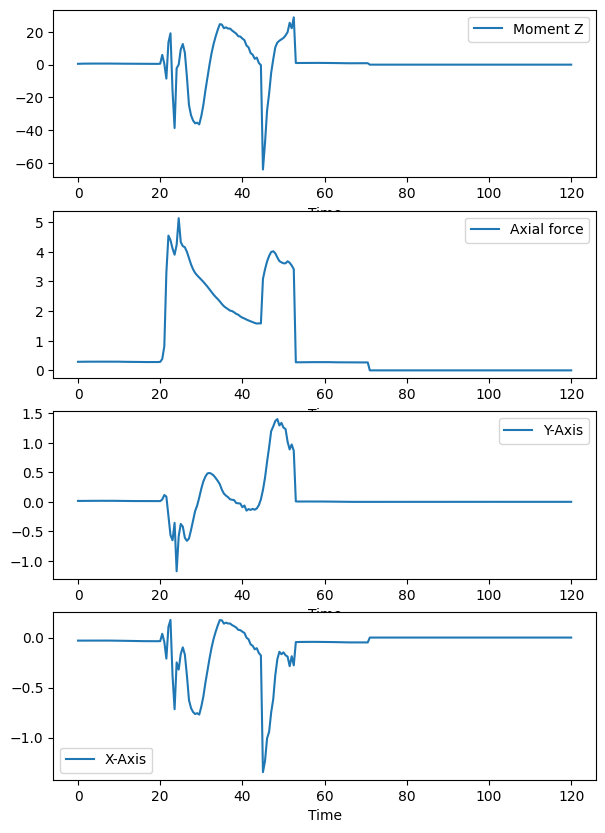

In [3]:
cols = [col for col in df.columns if col != "Time"]
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 10))
for idx, col in enumerate(cols):
    df.plot(x="Time", y=col, ax=axes[idx])

In [4]:
n = 100
m1Arr = genVal(100, 200, n)
m2Arr = genVal(1000, 1500, n)
m3Arr = genVal(1, 3, n)

In [5]:
periods = genVal(20, 40, n)
shifts = genVal(0, 100, n)
amps = genVal(0, 3, n)
taus = np.floor(genVal(200, 300, n))
bases = genVal(0, 10, n)

tsArr = []

for period, shift, amp, tau, base in zip(periods, shifts, amps, taus, bases):
    params = dict(period=period, shift=shift, amp=amp, tau=tau, base=base)
    ts = genTimeSeries(params)
    tsArr.append(ts)

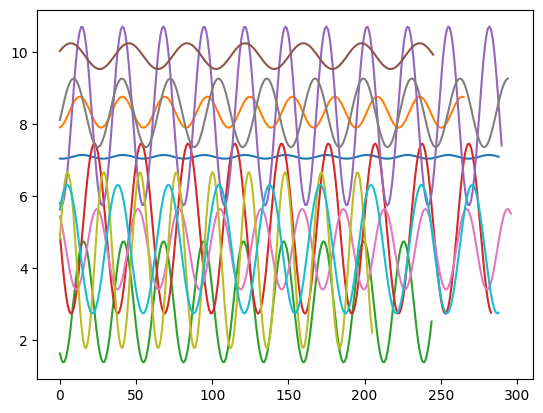

In [6]:
for i in range(10):
    t = tsArr[i][0]
    s = tsArr[i][1]
    plt.plot(t, s)

In [7]:
data = {
    "m1": m1Arr,
    "m2": m2Arr,
    "m3": m3Arr,
    "ts": tsArr,
    "_period": periods,
    "_shift": shifts,
    "_amp": amps,
    "_tau": taus,
    "_base": bases,
}

idxes = [f"E{str(i + 1).zfill(3)}" for i in np.arange(n)]
dfData = pd.DataFrame(data=data, index=idxes)
dfData

,m1,m2,m3,ts,_period,_shift,_amp,_tau,_base
E001,150.223716,1176.177278,1.142097,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.683906,4.379310,0.051326,289.0,7.098284
E002,102.534268,1483.654982,1.104716,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",27.906465,92.876753,0.430011,266.0,8.338143
E003,119.890549,1254.897451,2.162773,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.277206,60.707881,1.683730,245.0,3.070137
E004,162.830799,1302.043195,1.308283,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",30.713790,3.215551,2.362973,284.0,5.105714
E005,165.720956,1154.482314,1.566830,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.747296,23.317993,2.487571,291.0,8.232026
...,...,...,...,...,...,...,...,...,...
E096,145.018973,1201.258875,1.944356,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",31.833250,8.048349,0.592386,253.0,4.389179
E097,107.940589,1241.433511,1.827977,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",32.732961,9.408038,2.683826,232.0,6.883099
E098,154.310063,1203.547196,1.932303,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",30.365513,84.774948,1.405882,288.0,9.651756
E099,112.805873,1449.500433,1.409830,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",32.393297,72.133635,1.441833,294.0,3.989405


In [8]:
dfDataStats = dfData.describe()
dfDataStats

,m1,m2,m3,_period,_shift,_amp,_tau,_base
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,148.271265,1254.015366,1.859890,30.325143,50.729204,1.509092,248.090000,5.512312
std,30.318207,140.182023,0.588135,5.163331,28.834172,0.879800,28.945471,3.016378
min,101.172333,1003.795666,1.001186,20.026250,1.628752,0.026655,205.000000,0.071300
25%,119.997313,1132.126955,1.355073,26.536938,25.505771,0.638270,224.000000,3.243019
50%,149.490598,1251.284213,1.730032,29.974581,50.952921,1.603291,246.500000,5.607608
75%,176.598994,1377.366373,2.413823,34.039426,74.546876,2.218602,272.000000,8.341598
max,199.085220,1495.722954,2.994568,39.954820,99.621012,2.983076,298.000000,9.939049


In [9]:
def cal_y(row, stats):
    m1_mean = stats.loc["mean", "m1"]
    m2_mean = stats.loc["mean", "m2"]
    m3_mean = stats.loc["mean", "m3"]
    period_mean = stats.loc["mean", "_period"]
    y1 = (row["m1"] / m1_mean + row["_period"] / period_mean * 2) * 20
    y2 = (row["m2"] / m2_mean) / (row["_period"] / period_mean)
    y3 = ((row["m3"] / m3_mean) - (row["_period"] / period_mean * 2)) * -100
    return pd.Series(data=[y1, y2, y3], index=["y1", "y2", "y3"])
    pass


dfData[["y1", "y2", "y3"]] = dfData.apply(lambda row: cal_y(row, dfDataStats), axis=1)
dfData

,m1,m2,m3,ts,_period,_shift,_amp,_tau,_base,y1,y2,y3
E001,150.223716,1176.177278,1.142097,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.683906,4.379310,0.051326,289.0,7.098284,55.460434,1.065917,114.578620
E002,102.534268,1483.654982,1.104716,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",27.906465,92.876753,0.430011,266.0,8.338143,50.640306,1.285666,124.651484
E003,119.890549,1254.897451,2.162773,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.277206,60.707881,1.683730,245.0,3.070137,50.832405,1.154859,57.018054
E004,162.830799,1302.043195,1.308283,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",30.713790,3.215551,2.362973,284.0,5.105714,62.476545,1.025161,132.221218
E005,165.720956,1154.482314,1.566830,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.747296,23.317993,2.487571,291.0,8.232026,57.634438,1.043776,92.160269
...,...,...,...,...,...,...,...,...,...,...,...,...
E096,145.018973,1201.258875,1.944356,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",31.833250,8.048349,0.592386,253.0,4.389179,61.550555,0.912548,105.404790
E097,107.940589,1241.433511,1.827977,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",32.732961,9.408038,2.683826,232.0,6.883099,57.735882,0.917145,117.595850
E098,154.310063,1203.547196,1.932303,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",30.365513,84.774948,1.405882,288.0,9.651756,60.867811,0.958479,96.372797
E099,112.805873,1449.500433,1.409830,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",32.393297,72.133635,1.441833,294.0,3.989405,57.944120,1.082090,137.838072


In [10]:
dfDataStats = dfData.describe()
dfDataStats

,m1,m2,m3,_period,_shift,_amp,_tau,_base,y1,y2,y3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,148.271265,1254.015366,1.859890,30.325143,50.729204,1.509092,248.090000,5.512312,60.000000,1.029619,100.000000
std,30.318207,140.182023,0.588135,5.163331,28.834172,0.879800,28.945471,3.016378,7.366889,0.210191,44.572359
min,101.172333,1003.795666,1.001186,20.026250,1.628752,0.026655,205.000000,0.071300,42.449764,0.619599,7.816956
25%,119.997313,1132.126955,1.355073,26.536938,25.505771,0.638270,224.000000,3.243019,55.071075,0.866584,70.803668
50%,149.490598,1251.284213,1.730032,29.974581,50.952921,1.603291,246.500000,5.607608,60.822911,1.026643,104.524800
75%,176.598994,1377.366373,2.413823,34.039426,74.546876,2.218602,272.000000,8.341598,64.417260,1.163923,127.444190
max,199.085220,1495.722954,2.994568,39.954820,99.621012,2.983076,298.000000,9.939049,79.556093,1.706251,188.904488


In [11]:
def cal_y(row, stats):
    m1_mean = stats.loc["mean", "m1"]
    m2_mean = stats.loc["mean", "m2"]
    m3_mean = stats.loc["mean", "m3"]
    period_mean = stats.loc["mean", "_period"]
    y1 = (row["m1"] / m1_mean + row["_period"] / period_mean * 2) * 20
    y2 = (row["m2"] / m2_mean) / (row["_period"] / period_mean)
    y3 = ((row["m3"] / m3_mean) - (row["_period"] / period_mean * 2)) * -100
    return pd.Series(data=[y1, y2, y3], index=["y1", "y2", "y3"])
    pass


dfData[["y1", "y2", "y3"]] = dfData.apply(lambda row: cal_y(row, dfDataStats), axis=1)
dfData

,m1,m2,m3,ts,_period,_shift,_amp,_tau,_base,y1,y2,y3
E001,150.223716,1176.177278,1.142097,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.683906,4.379310,0.051326,289.0,7.098284,55.460434,1.065917,114.578620
E002,102.534268,1483.654982,1.104716,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",27.906465,92.876753,0.430011,266.0,8.338143,50.640306,1.285666,124.651484
E003,119.890549,1254.897451,2.162773,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.277206,60.707881,1.683730,245.0,3.070137,50.832405,1.154859,57.018054
E004,162.830799,1302.043195,1.308283,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",30.713790,3.215551,2.362973,284.0,5.105714,62.476545,1.025161,132.221218
E005,165.720956,1154.482314,1.566830,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.747296,23.317993,2.487571,291.0,8.232026,57.634438,1.043776,92.160269
...,...,...,...,...,...,...,...,...,...,...,...,...
E096,145.018973,1201.258875,1.944356,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",31.833250,8.048349,0.592386,253.0,4.389179,61.550555,0.912548,105.404790
E097,107.940589,1241.433511,1.827977,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",32.732961,9.408038,2.683826,232.0,6.883099,57.735882,0.917145,117.595850
E098,154.310063,1203.547196,1.932303,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",30.365513,84.774948,1.405882,288.0,9.651756,60.867811,0.958479,96.372797
E099,112.805873,1449.500433,1.409830,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",32.393297,72.133635,1.441833,294.0,3.989405,57.944120,1.082090,137.838072


In [12]:
filename = f"{aTime('S11')}.pickle"
filepath = f"output/{filename}"
savePickle(filepath=filepath, data=dfData)


S11__2025-04-21-052441
